# GoogLeNet from scratch (inception v1)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as plt
from tensorflow.keras import datasets,layers, models, utils
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import mnist
from sklearn.datasets import load_iris
from keras.utils import to_categorical
from keras.metrics import categorical_crossentropy
from sklearn import metrics
import matplotlib.pyplot as plt

2024-07-30 13:25:51.577219: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 13:25:51.577270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 13:25:51.578960: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_test.shape

(10000, 1)

In [4]:
x_train[0].shape

(32, 32, 3)

# inception module architecture

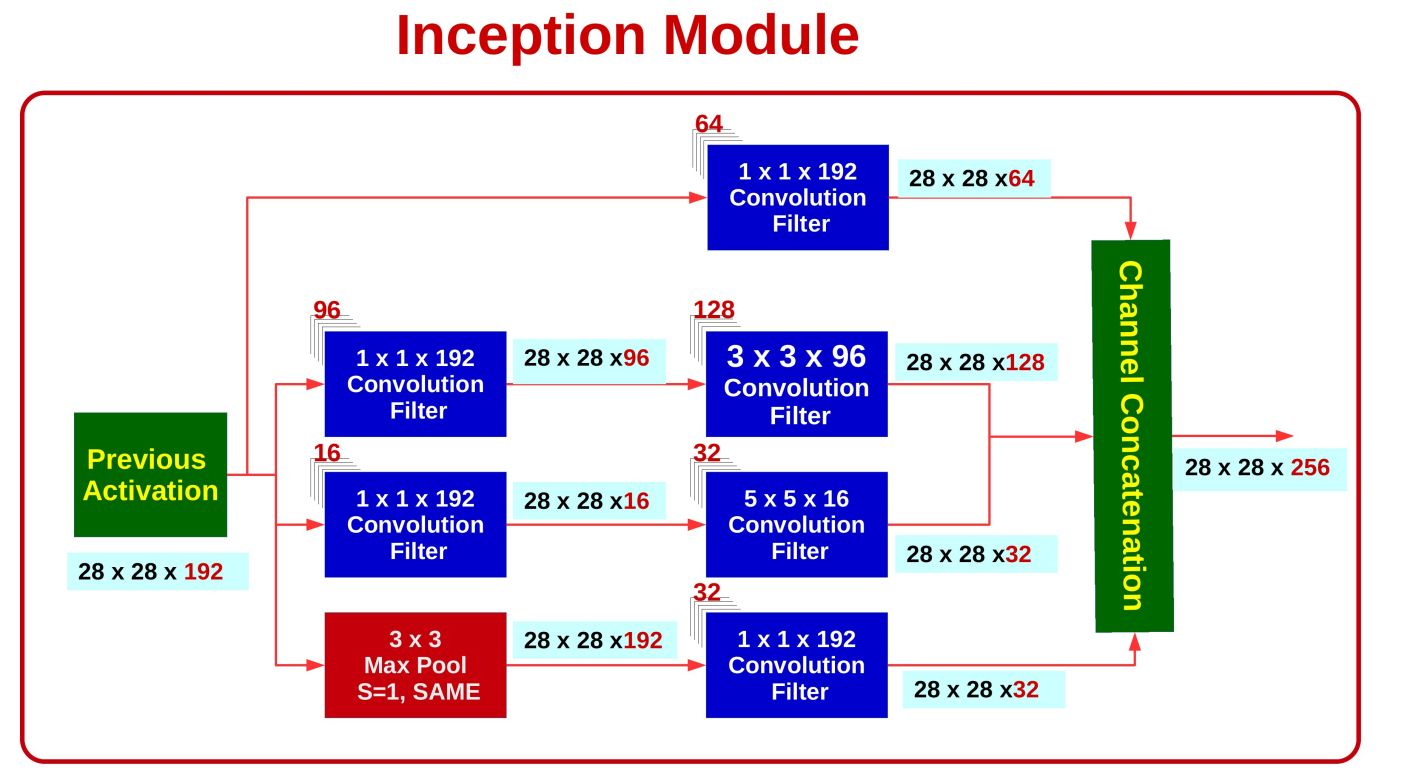

In [5]:
def inception_module(x, filters):
    a = layers.Conv2D(filters[0], (1,1), padding='same' ,activation='relu')(x)
    
    b = layers.Conv2D(filters[1], (1,1), padding='same' ,activation='relu')(x)
    b = layers.Conv2D(filters[2], (3,3), padding='same' ,activation='relu')(b)
    
    c = layers.Conv2D(filters[3], (1,1), padding='same' ,activation='relu')(x)
    c = layers.Conv2D(filters[4], (5,5), padding='same' ,activation='relu')(c)
    
    d = layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    d = layers.Conv2D(filters[5], (1,1), padding='same' ,activation='relu')(d)
    
    output = layers.Concatenate(axis=-1)([a, b, c, d])
    
    return output

# GoogLeNet architecture:

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Input, Concatenate, Dropout, GlobalAveragePooling2D

input_layer = Input(shape=(32, 32, 3))
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [64, 96, 128, 16, 32, 32])
x = inception_module(x, [128, 128, 192, 32, 96, 64])
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [192, 96, 208, 16, 48, 64])
x = inception_module(x, [160, 112, 224, 24, 64, 64])
x = inception_module(x, [128, 128, 256, 24, 64, 64])
x = inception_module(x, [112, 144, 288, 32, 64, 64])
x = inception_module(x, [256, 160, 320, 32, 128, 128])
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [256, 160, 320, 32, 128, 128])
x = inception_module(x, [384, 192, 384, 48, 128, 128])

x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 16, 16,    │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 8, 8, 64)  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 8, 8, 192) │    110,784 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 4, 4, 192) │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 4, 4, 96)  │     18,528 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 4, 4, 16)  │      3,088 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 192) │          0 │ max_pooling2d_1[… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 4, 4, 64)  │     12,352 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 4, 4, 128) │    110,720 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 4, 4, 32)  │     12,832 │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 4, 4, 32)  │      6,176 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 4, 4, 256) │          0 │ conv2d_2[0][0],   │
│ (Concatenate)       │                   │            │ conv2d_4[0][0],   │
│                     │                   │            │ conv2d_6[0][0],   │
│                     │                   │            │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 4, 4, 128) │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 4, 4, 32)  │      8,224 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 4, 4, 256) │          0 │ concatenate[0][0] │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 4, 4, 128) │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 4, 4, 192) │    221,376 │ conv2d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 4, 4, 96)  │     76,896 │ conv2d_11[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 4, 4, 64)  │     16,448 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 5,979,642 (22.81 MB)

 Trainable params: 5,979,642 (22.81 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
  3/782 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.0634 - loss: 2.3008   

I0000 00:00:1722345999.699030    6528 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722345999.750912    6528 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.1630 - loss: 2.1043
Epoch 2/20
  4/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.2471 - loss: 1.8995

W0000 00:00:1722346037.409787    6528 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3086 - loss: 1.7546
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4199 - loss: 1.5300
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4861 - loss: 1.3834
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5350 - loss: 1.2828
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5707 - loss: 1.1836
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6035 - loss: 1.1067
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6300 - loss: 1.0405
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6621 - loss: 0.9585
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6827 - loss: 0.9044
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7035 - loss: 0.8481
Epoch 12/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7224 - loss: 0.7946
Epoch 13/20
782/782 ━━━━━━━━━━━━━━━━━━━━

In [9]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
test_acc


W0000 00:00:1722346239.773077    6528 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 - 10s - 32ms/step - accuracy: 0.6477 - loss: 1.1971


W0000 00:00:1722346243.307138    6528 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


0.6477000117301941

**confusion matrix**

In [10]:
mnist_predictions = model.predict(x_test)
mnist_predicted_labels = np.argmax(mnist_predictions, axis=1)
mnist_confusion = confusion_matrix(y_test, mnist_predicted_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step


Text(70.72222222222221, 0.5, 'True classes')

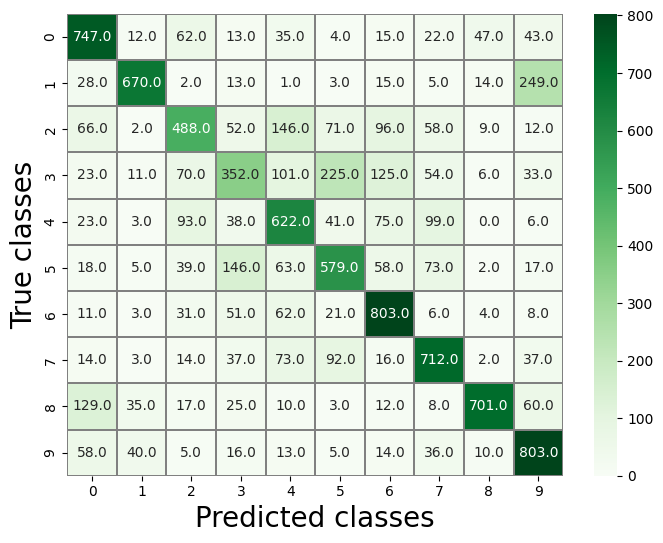

In [11]:
import seaborn as sns 

plt.figure(figsize = (8,6))
sns.heatmap(mnist_confusion, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

**precision:**
True Positive / (True Positive + False Positive)

In [12]:
Precision = metrics.precision_score(y_test, mnist_predicted_labels, average='weighted')
print(Precision,"of data that is predicted as true was exactly true")

0.6530473729903166 of data that is predicted as true was exactly true


**Recall:** True Positive / (True Positive + False Negative)

In [13]:
recall = metrics.recall_score(y_test, mnist_predicted_labels, average="weighted")
print(recall, "of the actual true data was predicted as true")

0.6477 of the actual true data was predicted as true


**F1 score:** 2 * ((Precision * recall) / (Precision + recall))

In [14]:
F1_score = metrics.f1_score(y_test, mnist_predicted_labels, average="weighted")
F1_score

0.6444980885498444

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test , mnist_predicted_labels))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1000
           1       0.85      0.67      0.75      1000
           2       0.59      0.49      0.54      1000
           3       0.47      0.35      0.40      1000
           4       0.55      0.62      0.59      1000
           5       0.55      0.58      0.57      1000
           6       0.65      0.80      0.72      1000
           7       0.66      0.71      0.69      1000
           8       0.88      0.70      0.78      1000
           9       0.63      0.80      0.71      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



# pretrained Inception v3 (on ImageNet):

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# Resize images to a smaller size, e.g., 75x75
input_size = (75, 75)
x_train = tf.image.resize(x_train, input_size)
x_test = tf.image.resize(x_test, input_size)

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [17]:
# Load InceptionV3 with pre-trained weights and exclude top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_size + (3,))

base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 37, 37,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 37, 37,    │         96 │ conv2d_56[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 37, 37,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 35, 35,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │         96 │ conv2d_57[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 35, 35,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        192 │ conv2d_58[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 17, 17,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 17, 17,    │      5,120 │ max_pooling2d_13… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 17, 17,    │        240 │ conv2d_59[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 17, 17,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 15, 15,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        576 │ conv2d_60[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 15, 15,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [18]:
# Add custom top layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Freeze the base model
base_model.trainable = False

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Use ImageDataGenerator to reduce memory usage
datagen = ImageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=32)
test_gen = datagen.flow(x_test, y_test, batch_size=32)

# Train the model
model.fit(train_gen, epochs=20, validation_data=test_gen)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   9/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.1413 - loss: 2.7065

W0000 00:00:1722346285.227388    6526 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  58/1563 ━━━━━━━━━━━━━━━━━━━━ 4:31 180ms/step - accuracy: 0.2338 - loss: 2.3352

W0000 00:00:1722346295.302246    6526 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4754 - loss: 1.5276

W0000 00:00:1722346321.064686    6526 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 28ms/step - accuracy: 0.4755 - loss: 1.5273 - val_accuracy: 0.6106 - val_loss: 1.1180
Epoch 2/20
   4/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.6315 - loss: 1.1403 

W0000 00:00:1722346328.324788    6526 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6062 - loss: 1.1368 - val_accuracy: 0.6253 - val_loss: 1.0850
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6284 - loss: 1.0554 - val_accuracy: 0.6365 - val_loss: 1.0635
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6533 - loss: 0.9858 - val_accuracy: 0.6326 - val_loss: 1.0547
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6774 - loss: 0.9127 - val_accuracy: 0.6377 - val_loss: 1.0540
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6898 - loss: 0.8703 - val_accuracy: 0.6397 - val_loss: 1.0757
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7120 - loss: 0.8072 - val_accuracy: 0.6377 - val_loss: 1.0799
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7310 - loss: 0.7608 - val_accuracy: 0.6311 - val_loss: 1.1050
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7448 - loss: 0.72

In [21]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
test_acc

313/313 - 4s - 12ms/step - accuracy: 0.6353 - loss: 1.4771


0.6352999806404114

**confusion matrix**

In [22]:
mnist_predictions = model.predict(x_test)
mnist_predicted_labels = np.argmax(mnist_predictions, axis=1)
mnist_confusion = confusion_matrix(y_test, mnist_predicted_labels)


 10/313 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step

W0000 00:00:1722346787.499237    6526 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step


W0000 00:00:1722346796.117058    6525 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Text(70.72222222222221, 0.5, 'True classes')

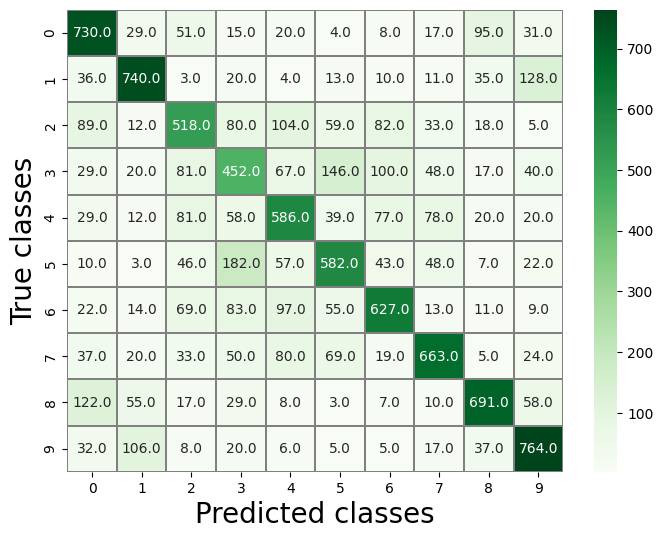

In [23]:
import seaborn as sns 

plt.figure(figsize = (8,6))
sns.heatmap(mnist_confusion, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

**precision:**
True Positive / (True Positive + False Positive)

In [24]:
Precision = metrics.precision_score(y_test, mnist_predicted_labels, average='weighted')
print(Precision,"of data that is predicted as true was exactly true")

0.6349192883343181 of data that is predicted as true was exactly true


**Recall:** True Positive / (True Positive + False Negative)

In [25]:
recall = metrics.recall_score(y_test, mnist_predicted_labels, average="weighted")
print(recall, "of the actual true data was predicted as true")

0.6353 of the actual true data was predicted as true


**F1 score:** 2 * ((Precision * recall) / (Precision + recall))

In [26]:
F1_score = metrics.f1_score(y_test, mnist_predicted_labels, average="weighted")
F1_score

0.6343525751726321

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test , mnist_predicted_labels))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1000
           1       0.73      0.74      0.74      1000
           2       0.57      0.52      0.54      1000
           3       0.46      0.45      0.45      1000
           4       0.57      0.59      0.58      1000
           5       0.60      0.58      0.59      1000
           6       0.64      0.63      0.63      1000
           7       0.71      0.66      0.68      1000
           8       0.74      0.69      0.71      1000
           9       0.69      0.76      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.63      0.64      0.63     10000
weighted avg       0.63      0.64      0.63     10000

